# Project M9: Exoplanet detection using the transit method

Marko Raidlo, Raidlo Everest

## Data clean up and feature engineering

In [1]:
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

import numpy as np
import pandas as pd
from scipy import ndimage, fft
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [2]:
# Ma ei saanud mingil põhjuselt selle meetodiga fourieri tööle normaalselt
def process(df):
    df_copy = df.copy()
    #Input: df with label column dropped
    size = df.iloc[0].size
    
    for i in range(len(df)):
        df.iloc[i] = np.abs(fft(df.iloc[i], size))
    
    for i in range(len(df)):
        df.iloc[i] = ndimage.filters.gaussian_filter(df.iloc[1], sigma=15)
    
    norm = lambda row : (row - np.mean(row)) / (np.max(row) - np.min(row))
    for i in range(len(df)):
        df.iloc[i] = norm(df.iloc[i])
        
    norm = lambda row : (row - np.mean(row)) / (np.std(row))
    for i in range(len(df)):
        df.iloc[i] = norm(df.iloc[i])
    

In [5]:
def pre_process(df):
    #fourier
    df_copy = df.copy()
    df_copy = df_copy.apply(fft ,axis=1)


    # Keep first half of data as it is symmetrical after previous steps
    df_copy = df_copy.iloc[:,:(df_copy.shape[1]//2)].values


    # Normalize
    df_copy = pd.DataFrame(normalize(df_copy))

    # Gaussian filter to smooth out data
    df_copy = ndimage.filters.gaussian_filter(df_copy, sigma=10)


    # Standardize X data
    std_scaler = StandardScaler()
    df_copy = std_scaler.fit_transform(df_copy)
    
    return df_copy

In [9]:
train = pd.read_csv('exoTrain.csv')
test = pd.read_csv('exoTest.csv')
    
train.columns = [train.columns[i].replace("FLUX.", "") for i in range(len(train.columns))]
test.columns = [test.columns[i].replace("FLUX.", "") for i in range(len(test.columns))]
    
train.LABEL = train.LABEL.replace(1, 0)
train.LABEL = train.LABEL.replace(2, 1)
    
test.LABEL = test.LABEL.replace(1, 0)
test.LABEL = test.LABEL.replace(2, 1)

train.head()

,LABEL,1,2,3,4,5,6,7,8,9,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


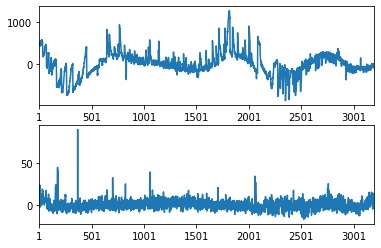

In [4]:
#Pre process plot

labels = train["LABEL"]
train = train.drop(["LABEL"], axis=1)

plt.subplot(211)
train.iloc[2].plot()
plt.subplot(212)
train.iloc[50].plot()

plt.show()

In [5]:
process(train)
train.head()

,1,2,3,4,5,6,7,8,9,10,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,5.512439,5.500011,5.475330,5.438638,5.390430,5.331225,5.261747,5.182736,5.095182,5.000001,...,4.602926,4.684932,4.760423,4.828530,4.888506,4.939615,4.981291,5.012976,5.034332,5.045062
1,5.512439,5.500011,5.475330,5.438638,5.390430,5.331225,5.261747,5.182736,5.095182,5.000001,...,4.602926,4.684932,4.760423,4.828530,4.888506,4.939615,4.981291,5.012976,5.034332,5.045062
2,4.741398,4.736673,4.727254,4.713202,4.694607,4.671590,4.644296,4.612899,4.577595,4.538602,...,4.217937,4.250992,4.280927,4.307555,4.330707,4.350235,4.366012,4.377936,4.385929,4.389939
3,4.741398,4.736673,4.727254,4.713202,4.694607,4.671590,4.644296,4.612899,4.577595,4.538602,...,4.217937,4.250992,4.280927,4.307555,4.330707,4.350235,4.366012,4.377936,4.385929,4.389939
4,4.741398,4.736673,4.727254,4.713202,4.694607,4.671590,4.644296,4.612899,4.577595,4.538602,...,4.217937,4.250992,4.280927,4.307555,4.330707,4.350235,4.366012,4.377936,4.385929,4.389939


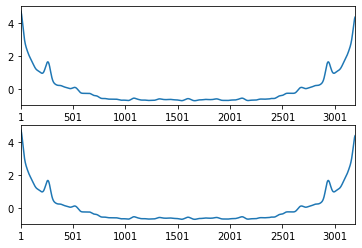

In [6]:
#Post process plot

plt.subplot(211)
train.iloc[2].plot()
plt.subplot(212)
train.iloc[50].plot()

plt.show()